In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s" % cv2.__version__)

OpenCV Version : 3.1.0


In [5]:
a = 3
b = 7

In [6]:
print(a+b)

10


In [2]:
img=cv2.imread('img01.jpg')



(720, 549, 3)


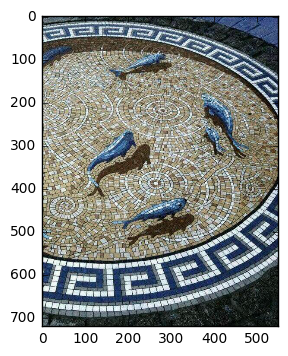

In [3]:
plt.imshow(img)
print(img.shape)

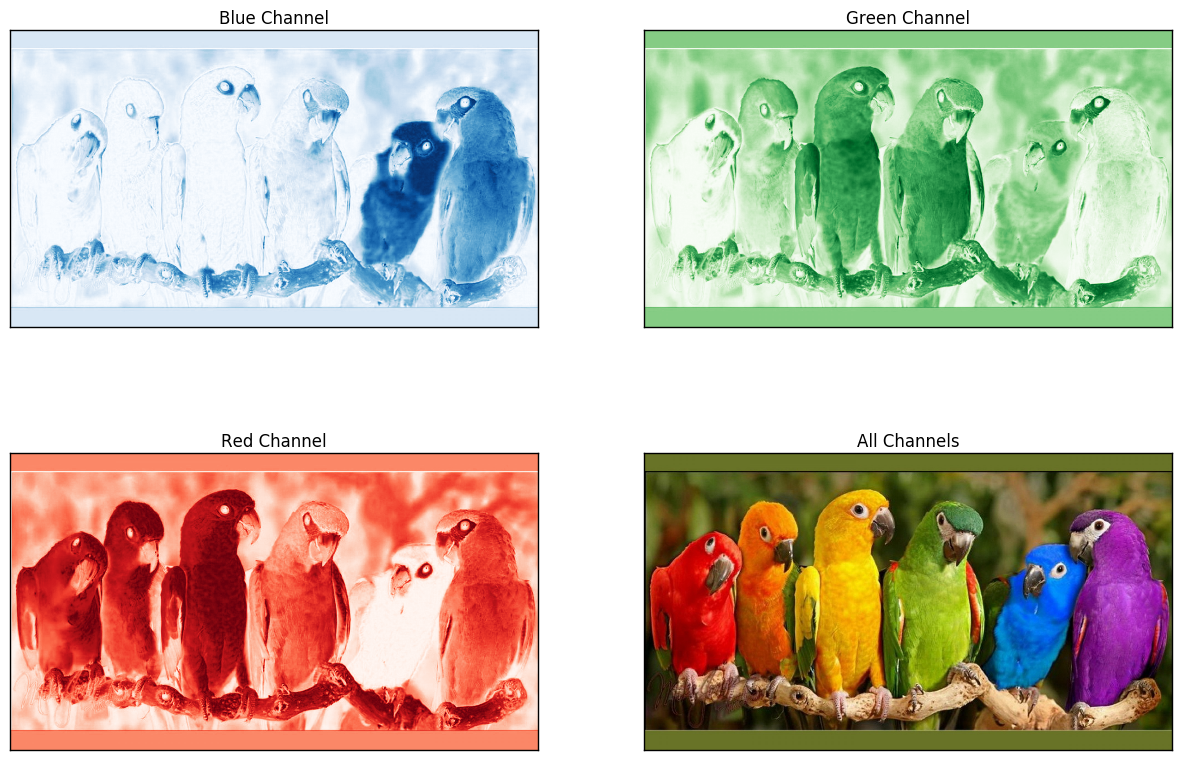

In [4]:
img= cv2.imread('birds.jpg')
b,g,r = cv2.split(img)
plt.figure(figsize = (15,10))
plt.subplot(221),plt.imshow(b, cmap='Blues'),plt.title('Blue Channel')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(g, cmap='Greens'),plt.title('Green Channel')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(r, cmap='Reds'),plt.title('Red Channel')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('All Channels')
plt.xticks([]), plt.yticks([])

plt.show()


[27 91 79]


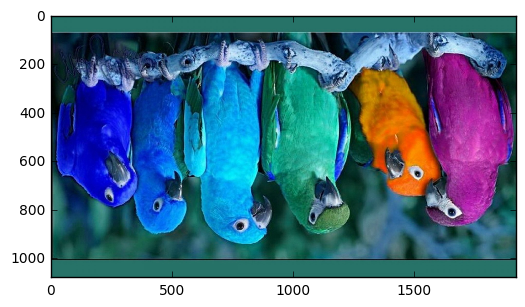

In [12]:
px = img[100,100]
print(px)

imgf=cv2.flip(img,0)
plt.imshow(imgf)


In [15]:
# accessing only blue pixel
blue = img[100,100,2]
print(blue)


79


In [16]:
img[100,100] = [255,255,255]
print(img[100,100])


[255 255 255]


In [17]:
print(img.shape)

(1080, 1920, 3)


In [18]:
 print(img.size)

6220800


In [19]:
print(img.dtype)

uint8


In [20]:
print(img[100,100])

[255 255 255]


In [23]:
imgroi = img[200:340, 300:390]

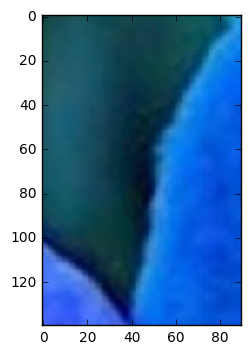

In [24]:
plt.imshow(imgroi)

In [ ]:
b,g,r = cv2.split(img)

In [ ]:
plt.imshow(b, cmap="gray")

72


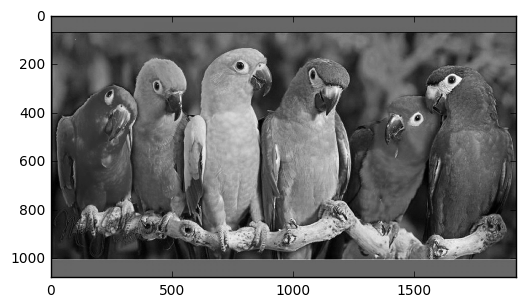

In [29]:
imggray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imggray, cmap='gray')
print(imggray[100,500])


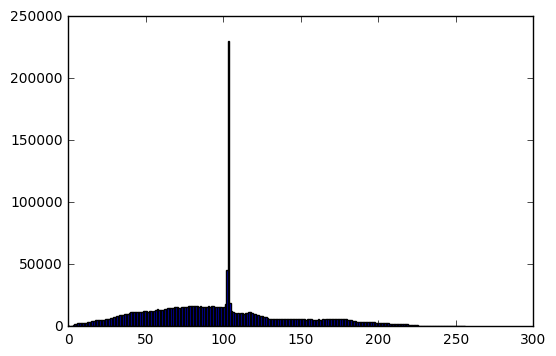

In [30]:
plt.hist(imggray.ravel(),256,[0,256])
plt.show()

# Image Arithmetic

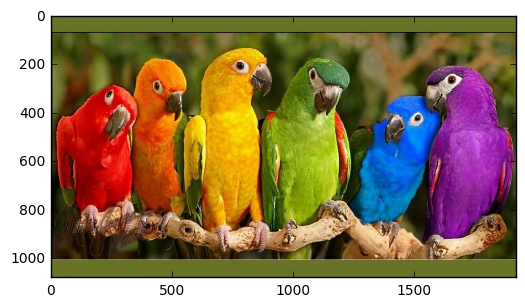

In [38]:
img1= cv2.imread('birds.jpg')
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)


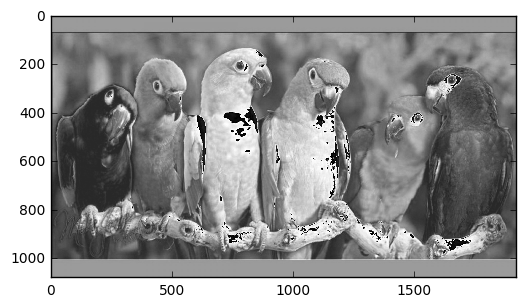

In [35]:
img2=img1
img2[:,:,0]=img1[:,:,1]
img2[:,:,1]=img1[:,:,1]
img2[:,:,2]=img1[:,:,1]

plt.imshow(img2)


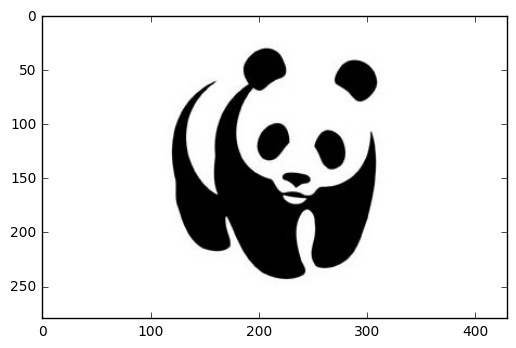

In [37]:
img3= cv2.imread('panda.jpg')

img3=cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.imshow(img3)



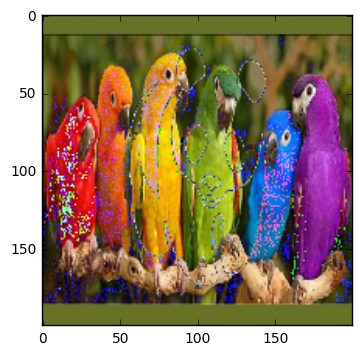

In [39]:
img1=cv2.resize(img1, (200,200))
img3=cv2.resize(img3,(200,200))
img4=img1+img3
plt.imshow(img4)

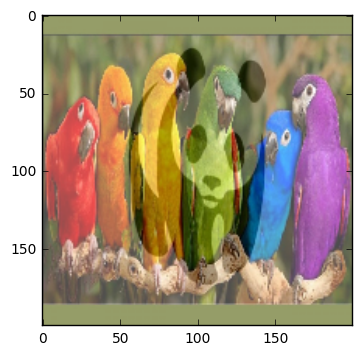

In [40]:
dst = cv2.addWeighted(img1,0.7,img3,0.3,0)
plt.imshow(dst)


(1080, 1920, 3)
(280, 430, 3)


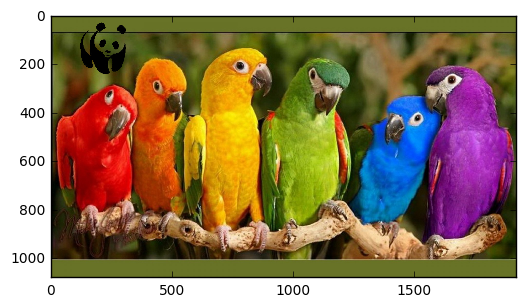

In [43]:
# LoadC two images
img1 = cv2.cvtColor(cv2.imread('birds.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('panda.jpg'), cv2.COLOR_BGR2RGB)

print(img1.shape)
print(img2.shape)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(img1)

In [44]:
green = np.uint8([[[0,100,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 100]]]


# 2D Convolution ( Image Filtering )
OpenCV provides a function cv2.filter2D() to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:

\begin{equation*}
K = \frac{1}{25}
\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}
\end{equation*}

Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image. Try this code and check the result:



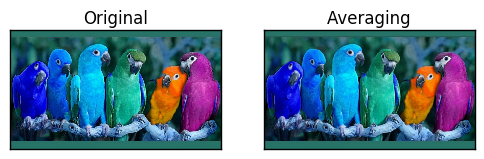

In [45]:
img=cv2.cvtColor(cv2.imread("img01.jpg"), cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Smoothing Ops

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which doesn't blur the edges too). OpenCV provides mainly four types of blurring techniques.

## 1. Averaging
This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. This is done by the function cv2.blur() or cv2.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like below:
    \begin{equation}
    K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
    \end{equation}

In [ ]:
blur = cv2.blur(img,(9,9))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 2. Gaussian Blurring
In this, instead of box filter, gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, cv2.getGaussianKernel().

The above code can be modified for Gaussian blurring:




In [ ]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
median = cv2.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
bilateralblur = cv2.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bilateralblur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


# Image Transformations

OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input.

## Scaling
Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods:

In [ ]:
#img = cv2.imread('messi5.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#plt.subplot(121),plt.imshow(img),plt.title('Original')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(res),plt.title('Scaled')
#plt.xticks([]), plt.yticks([])
plt.imshow(res)

## Translation
Translation is the shifting of object's location. If you know the shift in (x,y) direction, let it be (tx,ty), you can create the transformation matrix M as follows:
    \begin{equation}
        M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}
    \end{equation}

You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below example for a shift of (100,50):

In [ ]:
rows,cols,_ = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.imshow(dst)

## Rotation
Rotation of an image for an angle θ is achieved by the transformation matrix of the form
    \begin{equation}
        M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}
    \end{equation}
But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. 


In [ ]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),70,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

## Affine Transformations
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.


In [ ]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transformations
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix.

In [ ]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)

9 dst = cv2.warpPerspective(img,M,(300,300))
   10 
   11 plt.subplot(121),plt.imshow(img),plt.title('Input')
   12 plt.subplot(122),plt.imshow(dst),plt.title('Output')
   13 plt.show()